In [ ]:
# X-ray (diease detection)

In [40]:
import keras
from keras import preprocessing

In [41]:
from keras.preprocessing import image

In [42]:
from keras.preprocessing.image import ImageDataGenerator

In [43]:
ref = {"dir_train": (r'\Users\VISHAKKHA DASH\Desktop\ne\chest_xray\train'),
       "dir_test": (r'\Users\VISHAKKHA DASH\Desktop\ne\chest_xray\test')}

In [44]:
# preprocess the data
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

In [45]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [47]:
# lets create our images
training_set = train_datagen.flow_from_directory(ref["dir_train"],
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [48]:
test_set = test_datagen.flow_from_directory(ref["dir_test"],
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [49]:
print(training_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


## CNN MODEL

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.layers import Dense,Dropout

In [51]:
# model
Model = Sequential()

In [52]:
# add a convolution layer
Model.add(Conv2D(32,(3,3) , input_shape =(64,64,3), activation ="relu"))

In [53]:
#ppoling layer
Model.add(MaxPooling2D(pool_size = (2,2)))

In [54]:
# add a convolution layer
Model.add(Conv2D(16,(3,3) , activation ="relu"))

In [55]:
#ppoling layer
Model.add(MaxPooling2D(pool_size = (2,2)))

In [56]:
# add a convolution layer
#Model.add(Conv2D(8,(3,3) , activation ="relu"))
#ppoling layer
#Model.add(MaxPooling2D(pool_size = (2,2)))

In [57]:
16*16

256

In [58]:
# flatten layer
Model.add(Flatten())

In [59]:
# full connection layer
Model.add(Dense(units = 128,activation='relu'))
Model.add(Dense(units = 64,activation='relu'))
Model.add(Dense(units = 1,activation='sigmoid'))

In [60]:
#model compile
Model.compile(optimizer ='adam', loss='binary_crossentropy',metrics =['accuracy'])

In [61]:
# Do you have any define variable for depenedent 
# and how upu will pass data for X,Y

In [62]:
# for Keras in case we use image data generator we will prefer
# Model.fit_generator
Model.fit_generator(training_set, steps_per_epoch= 1375/32,
                    epochs = 5,
                    validation_data= test_set,
                    validation_steps= 336/32)

C:\Users\VISHAKKHA DASH\AppData\Local\Temp\ipykernel_24544\2375698147.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model.fit_generator(training_set, steps_per_epoch= 1375/32,


Epoch 1/5
42/42 [==============================] - 23s 515ms/step - loss: 0.5370 - accuracy: 0.7645 - val_loss: 0.5774 - val_accuracy: 0.7273
Epoch 2/5
42/42 [==============================] - 19s 449ms/step - loss: 0.3868 - accuracy: 0.8336 - val_loss: 0.3473 - val_accuracy: 0.8466
Epoch 3/5
42/42 [==============================] - 20s 455ms/step - loss: 0.3195 - accuracy: 0.8517 - val_loss: 0.3447 - val_accuracy: 0.8409
Epoch 4/5
42/42 [==============================] - 20s 461ms/step - loss: 0.3165 - accuracy: 0.8590 - val_loss: 0.4039 - val_accuracy: 0.8153
Epoch 5/5
42/42 [==============================] - 20s 461ms/step - loss: 0.2513 - accuracy: 0.8990 - val_loss: 0.3994 - val_accuracy: 0.8239


In [63]:
# test an image
import numpy as np
from keras.preprocessing  import image

In [64]:
testing_image = image.load_img(r'\Users\VISHAKKHA DASH\Desktop\ne\chest_xray\test\PNEUMONIA\person100_bacteria_475.jpeg',
                               target_size = (64,64))

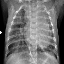

In [65]:
testing_image

In [66]:
test_image = image.img_to_array(testing_image)

In [67]:
test_img = np.expand_dims(test_image,axis=0)

In [68]:
pred = Model.predict(test_img)

1/1 [==============================] - 0s 90ms/step


In [69]:
ref = {0: 'NORMAL',1: 'PNEUMONIA'}

In [70]:
print("My image is classified as :", ref[int(pred[0][0])])

My image is classified as : PNEUMONIA


In [ ]:
# We have a trained model  so in case if i want to save this what should i do
# can i save this model as a pickle model

In [ ]:
# pickle module - to dump you trained model and then again use them
import pickle
model = pickle.dumps(Model)


In [ ]:
# create a pcikle file
f = open("/content/CNN_fase_mask_model_prediction.pickle", "wb")

In [ ]:
f.write(model)
f.close()

In [ ]:
# In case i need to use this model but i don't want to re-train it

In [ ]:
# loading a pre-trained pickle model
f = open("/content/CNN_fase_mask_model_prediction.pickle", "rb")
Mod = f.read()
Model_pretrained = pickle.loads(Mod)
f.close()

In [ ]:
# test an image
import numpy as np
from keras.preprocessing  import image
testing_image = image.load_img("/content/drive/MyDrive/test_mask_det/with_mask/201-with-mask.jpg",
                               target_size = (64,64))
test_image = image.img_to_array(testing_image)
test_img = np.expand_dims(test_image,axis=0)
pred = Model_pretrained.predict(test_img)
ref = { 0 :"with_mask", 1: "without_mask"}
print("My image is classified as :", ref[int(pred[0][0])])

In [ ]:
# R-CNN : https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e